In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.model_selection import GridSearchCV

In [2]:
%%time
df = pd.read_csv("../data/df_CatVal_cleanedV3.csv",
               encoding="utf-8", low_memory=False, index_col=0)

CPU times: total: 39.9 s
Wall time: 40 s


In [3]:
df.shape

(1833614, 144)

In [4]:
df.dropna(subset=['product_name'], inplace=True)

In [5]:
df_init = df

In [6]:
for i in range(len(df.columns)) :
    print(df.dtypes.index[i], ' : ', df.dtypes[i])

code  :  object
product_name  :  object
categories  :  object
serving_quantity  :  float64
additives_n  :  float64
nutriscore  :  float64
nutrigrade  :  int64
nova_group  :  float64
pnns1  :  object
ecoscore_score  :  float64
product_quantity  :  float64
unique_scans_n  :  float64
completeness  :  float64
energy-kj_100g  :  float64
energy-kcal_100g  :  float64
energy_100g  :  float64
energy-from-fat_100g  :  float64
fat_100g  :  float64
saturated-fat_100g  :  float64
butyric-acid_100g  :  float64
caproic-acid_100g  :  float64
caprylic-acid_100g  :  float64
capric-acid_100g  :  float64
lauric-acid_100g  :  float64
myristic-acid_100g  :  float64
palmitic-acid_100g  :  float64
stearic-acid_100g  :  float64
arachidic-acid_100g  :  float64
behenic-acid_100g  :  float64
lignoceric-acid_100g  :  float64
cerotic-acid_100g  :  float64
montanic-acid_100g  :  float64
melissic-acid_100g  :  float64
unsaturated-fat_100g  :  float64
monounsaturated-fat_100g  :  float64
polyunsaturated-fat_100g  :  f

In [7]:
col_names=[]
for x in df.columns:
    col_names.append(x)

In [8]:
index=0
for i in (df.loc[6]):
    print(str(col_names[index])+" : "+str(i))
    index+=1

code : 0000000000100
product_name :  moutarde au moût de raisin 
categories : condiment , sauce , mustard , grocery
serving_quantity : 30.0
additives_n : 0.0
nutriscore : 18.0
nutrigrade : 3
nova_group : 4.0
pnns1 : fat and sauce
ecoscore_score : 54.0
product_quantity : 100.0
unique_scans_n : 1.0
completeness : 0.7625
energy-kj_100g : 936.0
energy-kcal_100g : 146.0
energy_100g : 936.0
energy-from-fat_100g : 126.0
fat_100g : 8.2
saturated-fat_100g : 2.2
butyric-acid_100g : 0.8
caproic-acid_100g : 0.09
caprylic-acid_100g : 1.0
capric-acid_100g : 0.9
lauric-acid_100g : 7.0
myristic-acid_100g : 2.0
palmitic-acid_100g : 25.5
stearic-acid_100g : 3.0
arachidic-acid_100g : 4e-05
behenic-acid_100g : 0.5
lignoceric-acid_100g : 0.0
cerotic-acid_100g : 8.0
montanic-acid_100g : 3.15
melissic-acid_100g : 27.0
unsaturated-fat_100g : 5.8
monounsaturated-fat_100g : 6.67
polyunsaturated-fat_100g : 10.0
omega-3-fat_100g : 2.32
alpha-linolenic-acid_100g : 0.8
eicosapentaenoic-acid_100g : 1.1
docosahexaeno

In [9]:
df['pnns1'] = pd.factorize(df['pnns1'])[0]

In [10]:
#df.drop(columns = ['quantity_num'], inplace=True)

### Normalisation

In [11]:
# Sélectionner les colonnes numériques
numeric_cols = list(df.select_dtypes(include=["float64","int64"]).columns)

In [12]:
# Créer un scaler MinMax
scaler = StandardScaler()

In [13]:
# Appliquer la normalisation aux colonnes numériques
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [14]:
# Sélectionner les colonnes numériques
cols_to_convert_int = list(df.select_dtypes(include=["int64"]).columns)
cols_to_convert_float = list(df.select_dtypes(include=["float64"]).columns)

# Changing format of object and float64 columns
df[cols_to_convert_int] = df[cols_to_convert_int].astype('int32')
df[cols_to_convert_float] = df[cols_to_convert_float].astype('float32')

### X et y

In [15]:
# Sélectionner les colonnes numériques
numeric_cols.remove('pnns1')
numeric_cols.remove('nutriscore')
numeric_cols.remove('unique_scans_n')
numeric_cols.remove('completeness')

In [1]:
X = df[numeric_cols]

NameError: name 'df' is not defined

In [17]:
y = df['product_name']

### Petite PCA

In [18]:
# Réduire la dimensionnalité avec PCA
pca = PCA(n_components=20)
pca_df = pd.DataFrame(pca.fit_transform(df[numeric_cols]))

In [19]:
from sklearn.cluster import KMeans

k = 10
k_values = range(1, k+1)
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\joell\VSCode\OpenFoodFact_Cluster\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

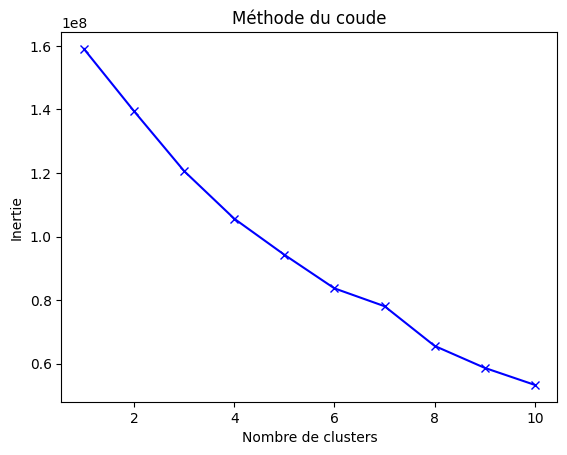

In [20]:
import matplotlib.pyplot as plt

plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title("Méthode du coude")
plt.show()

In [21]:
# Sélectionner le nombre optimal de clusters
k = 11

## DBSCAN

In [ ]:
%%time
# Appliquer DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(pca_df)

In [ ]:
df['cluster_D_pca'] = kmeans.labels_

In [ ]:
clusterPCA_DB0 = df['product_name'].where(df['cluster_D_pca'] == 0)
clusterPCA_DB1 = df['product_name'].where(df['cluster_D_pca'] == 1)
clusterPCA_DB2 = df['product_name'].where(df['cluster_D_pca'] == 2)
clusterPCA_DB3 = df['product_name'].where(df['cluster_D_pca'] == 3)
clusterPCA_DB4 = df['product_name'].where(df['cluster_D_pca'] == 4)
clusterPCA_DB5 = df['product_name'].where(df['cluster_D_pca'] == 5)

s_arr = []

def sio_factory():
    return StringIO()

for cluster in [clusterPCA_DB0, clusterPCA_DB1, clusterPCA_DB2,clusterPCA_DB3, clusterPCA_DB4, clusterPCA_DB5]:
    si = sio_factory()
    cluster.apply(lambda x: si.write(str(x)))
    s_arr.append(si.getvalue())
    si.close()
    
cleaned = []
for s in s_arr:
    tokenized = word_tokenize(s)
    filtered_tokenized = list(filter(lambda x: x.lower() not in stop_words, tokenized))
    cleaned.append(filtered_tokenized)
    
final = []
for i in cleaned:
    final.append(' '.join(i))

for i, s in enumerate(final):
    text = s
    wordcloud = WordCloud(background_color="white",max_words=30,max_font_size=40, relative_scaling=.5).generate(text)
    plt.title('Cluster ' + str(i))
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
# Enregistrer le modèle sur le disque
joblib.dump(dbscan, 'dbscan_pca.pkl')
# Charger le modèle sauvegardé depuis le disque
dbscan = joblib.load('dbscan_pca.pkl')